# 06. Decision Trees Homework

## 06.1 Dataset

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import wget

from sklearn.model_selection import train_test_split

In [2]:
data_url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
data = wget.download(data_url, "car_fuel_efficiency.csv")

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

# 06.2 Preparing the dataset
Preparation:

* Fill missing values with zeros.
* Do train/validation/test split with 60%/20%/20% distribution.
* Use the train_test_split function and set the random_state parameter to 1.
* Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [3]:
!head car_fuel_efficiency.csv

engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
170,3,159,3413.433758606219,17.7,2003,Europe,Gasoline,All-wheel drive,0,13.231728906241411
130,5,97,3149.6649342200353,17.8,2007,USA,Gasoline,Front-wheel drive,0,13.688217435463793
170,,78,3079.03899736884,15.1,2018,Europe,Gasoline,Front-wheel drive,0,14.246340998160866
220,4,,2542.392401828378,20.2,2009,USA,Diesel,All-wheel drive,2,16.91273559598635
210,1,140,3460.870989989018,14.4,2009,Europe,Gasoline,All-wheel drive,2,12.488369121964562
190,3,,2484.883986036068,14.7,2008,Europe,Gasoline,All-wheel drive,-1,17.271818372724237
240,7,127,3006.5422872171457,22.2,2012,USA,Gasoline,Front-wheel drive,1,13.210412112385608
150,4,239,3638.6577802809,17.3,2020,USA,Diesel,All-wheel drive,1,12.848883861524026
250,1,174,2714.219309645285,10.3,2016,Asia,Diesel,Front-wheel drive,-1,16.823553726916543


In [4]:
df = pd.read_csv(data)

In [5]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


Columns names are normalize

In [6]:
df.describe().round()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.0,9222.0,8996.0,9704.0,8774.0,9704.0,9202.0,9704.0
mean,200.0,4.0,150.0,3001.0,15.0,2011.0,-0.0,15.0
std,49.0,2.0,30.0,498.0,3.0,7.0,1.0,3.0
min,10.0,0.0,37.0,953.0,6.0,2000.0,-4.0,6.0
25%,170.0,3.0,130.0,2666.0,13.0,2006.0,-1.0,13.0
50%,200.0,4.0,149.0,2993.0,15.0,2012.0,0.0,15.0
75%,230.0,5.0,170.0,3335.0,17.0,2017.0,1.0,17.0
max,380.0,13.0,271.0,4739.0,24.0,2023.0,4.0,26.0


In [7]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:10])
    print(df[col].nunique())
    print()

engine_displacement
[170 130 220 210 190 240 150 250 230 320]
36

num_cylinders
[ 3.  5. nan  4.  1.  7.  6.  2.  8.  0.]
14

horsepower
[159.  97.  78.  nan 140. 127. 239. 174. 123. 100.]
192

vehicle_weight
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999
 2484.88398604 3006.54228722 3638.65778028 2714.21930965 3509.0365691 ]
9704

acceleration
[17.7 17.8 15.1 20.2 14.4 14.7 22.2 17.3 10.3 10.2]
162

model_year
[2003 2007 2018 2009 2008 2012 2020 2016 2005 2014]
24

origin
['Europe' 'USA' 'Asia']
3

fuel_type
['Gasoline' 'Diesel']
2

drivetrain
['All-wheel drive' 'Front-wheel drive']
2

num_doors
[ 0.  2. -1.  1. nan -2. -3.  3. -4.  4.]
9

fuel_efficiency_mpg
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912 17.27181837
 13.21041211 12.84888386 16.82355373 12.29835498]
9704



In [8]:
# Check nulls
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

There are only NaN in numerical columns

In [9]:
# Fill NaN with O
for n in df.columns:
    df[n] = df[n].fillna(0)

In [10]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,0.0,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,0.0,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


Do train/validation/test split with 60%/20%/20% distribution

In [11]:
# Split data
random_state = 1

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=random_state)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=random_state)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg
y_val = df_val.fuel_efficiency_mpg
y_test = df_test.fuel_efficiency_mpg

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [12]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,120,5.0,169.0,2966.679505,13.9,2005,USA,Gasoline,Front-wheel drive,-1.0
1,200,3.0,143.0,2950.822121,17.1,2013,Asia,Diesel,Front-wheel drive,-1.0
2,180,6.0,180.0,3078.221669,17.4,2007,USA,Gasoline,All-wheel drive,0.0
3,280,5.0,174.0,2797.991793,0.0,2016,USA,Diesel,All-wheel drive,0.0
4,250,4.0,133.0,2362.426930,16.3,2010,USA,Diesel,Front-wheel drive,-1.0
...,...,...,...,...,...,...,...,...,...,...
5817,230,3.0,176.0,3430.993044,17.9,2022,Europe,Diesel,All-wheel drive,0.0
5818,250,4.0,180.0,3067.664350,15.7,2010,Asia,Diesel,All-wheel drive,-1.0
5819,230,2.0,182.0,3041.964593,16.7,2010,Europe,Diesel,All-wheel drive,0.0
5820,180,7.0,147.0,2453.341430,15.2,2015,Europe,Gasoline,All-wheel drive,0.0


## Question 1

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [14]:
train_dicts = df_train.to_dict(orient='records')

dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)


In [15]:
depth = 1

dt = DecisionTreeRegressor(max_depth=depth)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [16]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



## Question 2

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [18]:
rf = RandomForestRegressor(
    n_estimators=10, 
    n_jobs=-1, 
    random_state=1
)

rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [19]:
y_pred = rf.predict(X_val)
y_pred

array([18.62692845, 15.23747064, 18.20763942, ..., 14.81525146,
       13.52753444, 16.10909938], shape=(1941,))

In [20]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [21]:
rmse_val = rmse(y_val, y_pred)
rmse_val.round(3)

np.float64(0.46)

## Question 3

In [22]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(
        n_estimators=n, 
        n_jobs=-1, 
        random_state=1
    )

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse_val = rmse(y_val, y_pred)
    
    scores.append((n, rmse_val.round(3)))

In [23]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse_val'])

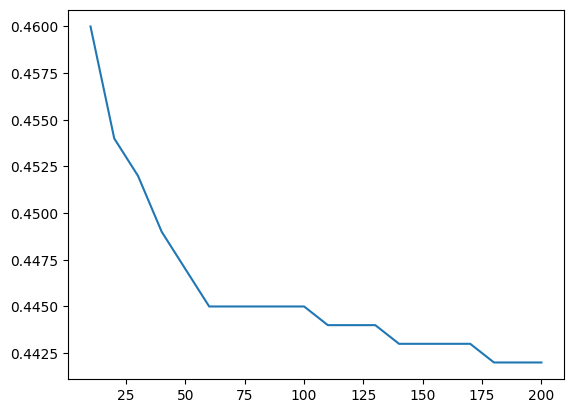

In [24]:
plt.plot(df_scores.n_estimators, df_scores.rmse_val)

## Question 4

In [25]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(
            n_estimators=n, 
            max_depth=d,
            n_jobs=-1, 
            random_state=1
        )
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse_val = rmse(y_val, y_pred)
        
        scores.append((d, n, rmse_val.round(3)))

In [26]:
columns = ['max_depth', 'n_estimators', 'rmse_val']
df_scores = pd.DataFrame(scores, columns=columns)

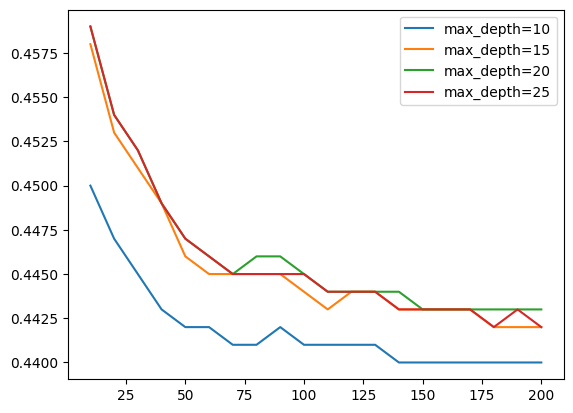

In [27]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse_val,
             label='max_depth=%d' % d)

plt.legend()

## Question 5

In [28]:
rf = RandomForestRegressor(
    n_estimators=10, 
    max_depth=20,
    n_jobs=-1, 
    random_state=1
)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [29]:
importances = rf.feature_importances_
importances

array([1.14797006e-02, 3.57108549e-04, 3.45384113e-04, 3.27279191e-03,
       3.25424323e-04, 3.60383601e-04, 1.59978977e-02, 3.21230009e-03,
       2.34334695e-03, 1.63498954e-03, 4.62246496e-04, 5.18739639e-04,
       5.39721689e-04, 9.59149965e-01])

In [30]:
feature_names = dv.get_feature_names_out()
feature_names

array(['acceleration', 'drivetrain=All-wheel drive',
       'drivetrain=Front-wheel drive', 'engine_displacement',
       'fuel_type=Diesel', 'fuel_type=Gasoline', 'horsepower',
       'model_year', 'num_cylinders', 'num_doors', 'origin=Asia',
       'origin=Europe', 'origin=USA', 'vehicle_weight'], dtype=object)

In [31]:
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

In [32]:
feature_importance_df.sort_values(by='importance', ascending=False)

,feature,importance
13,vehicle_weight,0.959150
6,horsepower,0.015998
0,acceleration,0.011480
3,engine_displacement,0.003273
7,model_year,0.003212
8,num_cylinders,0.002343
9,num_doors,0.001635
12,origin=USA,0.000540
11,origin=Europe,0.000519
10,origin=Asia,0.000462


## Question 6

In [33]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [34]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [35]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [36]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model_03 = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)


[0]	train-rmse:1.81393	val-rmse:1.85444
[5]	train-rmse:0.51381	val-rmse:0.55664
[10]	train-rmse:0.37115	val-rmse:0.43896
[15]	train-rmse:0.34666	val-rmse:0.43362
[20]	train-rmse:0.33553	val-rmse:0.43376
[25]	train-rmse:0.32268	val-rmse:0.43683
[30]	train-rmse:0.31475	val-rmse:0.43752
[35]	train-rmse:0.30960	val-rmse:0.43784
[40]	train-rmse:0.30202	val-rmse:0.43968
[45]	train-rmse:0.29126	val-rmse:0.44024
[50]	train-rmse:0.28456	val-rmse:0.44140
[55]	train-rmse:0.27618	val-rmse:0.44225
[60]	train-rmse:0.26768	val-rmse:0.44290
[65]	train-rmse:0.26174	val-rmse:0.44352
[70]	train-rmse:0.25489	val-rmse:0.44531
[75]	train-rmse:0.24792	val-rmse:0.44628
[80]	train-rmse:0.24254	val-rmse:0.44689
[85]	train-rmse:0.23644	val-rmse:0.44749
[90]	train-rmse:0.23193	val-rmse:0.44839
[95]	train-rmse:0.22475	val-rmse:0.44904
[99]	train-rmse:0.21950	val-rmse:0.45018


In [37]:
y_pred_03 = model_03.predict(dval)
rmse_val_03 = rmse(y_val, y_pred_03)
print("RMSE eta=0.3:", rmse_val_03)

RMSE eta=0.3: 0.45017755678087246


In [38]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model_01 = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [39]:
y_pred_01 = model_01.predict(dval)
rmse_val_01 = rmse(y_val, y_pred_01)
print("RMSE eta=0.1:", rmse_val_01)

RMSE eta=0.1: 0.42622800553359225
